In [32]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
df = pd.read_csv("../../db/data/merge/tertiary/idxs_.csv",index_col=0)
df_logs = pd.read_csv("../../db/data/merge/tertiary/logs_.csv",index_col=0)

## *Bollinger Bands Function* 
#### (we are not going to use this function, just to "show off")

In [34]:
def get_bollinger_bands(df, rate=5, sigma_start=2, sigma_stop=2):
    
    sma = df.rolling(rate).mean()
    bollinger_bands = {"sma":sma}
    std = df.rolling(rate).std()
    for sigma in range(sigma_start, sigma_stop+1):
        up = sma + std * sigma
        down = sma - std * sigma
        bollinger_bands[f'up{sigma}'] = up
        bollinger_bands[f'down{sigma}'] = down
    bol = pd.DataFrame.from_dict(bollinger_bands)
    bol.set_index(df.index, inplace=True)
    return bol


## *Bollinger reduced*

In [35]:
def bollinger_small(df, rate=5, sigma_start=2, sigma_stop=2):
    
    data = pd.DataFrame([])
    
    for currency in df.columns:
        data[f'{currency}_sma'] = df[currency].rolling(rate).mean()
        data[f'{currency}_std']= df[currency].rolling(rate).std()
        
    data.index = df.index
    
    return data

## *Volatility Function*

In [43]:
def volatility(df,rate=240,window=506):
    
    data = pd.DataFrame([])
    for currency in df.columns:
        data[f"{currency}_vol1"] = df[currency].rolling(rate).std()/(window**0.5)
        data[f"{currency}_vol2"] = df[currency].rolling(rate).std()*(window**0.5)
    data.index = df.index
    
    return data

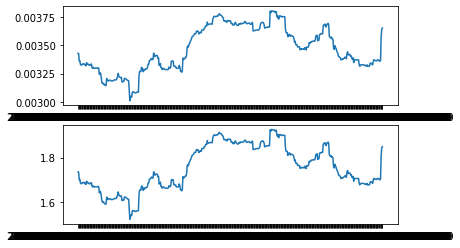

## *ATR Function*

In [3]:
def ema(df: pd.Series, window: int):
    return df.ewm(alpha=1/window, adjust=False).mean()
def atr(close: pd.DataFrame, low: pd.DataFrame, high: pd.DataFrame, window:int=14):
    data = pd.DataFrame([])
    ccy_pairs = close.columns
    for pair in ccy_pairs:
        data[f'close_{pair}'] = close[pair]
        data[f'high_{pair}'] = high[pair]
        data[f'low_{pair}'] = low[pair]
        data[f'tr0_{pair}'] = data[f'high_{pair}'] - data[f'low_{pair}']
        data[f'tr1_{pair}'] = np.abs(data[f'high_{pair}'] - data[f'close_{pair}'].shift())
        data[f'tr2_{pair}'] = np.abs(data[f'low_{pair}'] - data[f'close_{pair}'].shift())
        data[f'tr_{pair}'] = data[[f'tr0_{pair}', f'tr1_{pair}', f'tr2_{pair}']].max(axis=1)
        data[f'atr_{pair}'] = ema(data[f'tr_{pair}'], window)
    data.dropna(inplace=True)
    return data

## *Sharpe Ratio*

In [ ]:
# def sharpe():
#     Sharpe_Ratio = portf_val[‘Daily Return’].mean() / portf_val[‘Daily Return’].std()